<a href="https://colab.research.google.com/github/Arshad-06/DoggoDetective/blob/master/DoggoDetective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-To-End Multi-Class Dog Breed Classifier

This notebook builds an end-to-end multi class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem

Identify the breed of a dog given the image of a dog. 

When I'm sitting at a cafe and I take a photo of a dog, I want to know what breed the dog belongs to.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data), so it's probably best we use deep learning / transfer learning.
* There are 120 breeds of dogs (This means there are 120 different classes)
* There are around 10,000+ images in the training set (These images have labels)
* There are around 10,000+ images in the test set (These images have no labels, as we'll have to predict them)

### Getting Our Workspace Ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using a GPU ✅


In [ ]:
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow Version : ", tf.__version__)
print("TensorFlow Hub Version : ", hub.__version__)

# Check For GPU Availability
print("GPU", "Available (YES!)" if tf.config.list_physical_devices("GPU") else "Not Available :(")

TensorFlow Version :  2.11.0
TensorFlow Hub Version :  0.13.0
GPU Not Available :(


In [ ]:
import warnings
warnings.simplefilter("ignore", category=PendingDeprecationWarning) # Handle Deprecation Warnings

## Getting Our Data Ready (Turning It Into Tensors)

For all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into tensors (numerical representation)

Let's start by accessing our data and checking out our labels

In [ ]:
# Checkout the labels of our data

import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/DogVision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


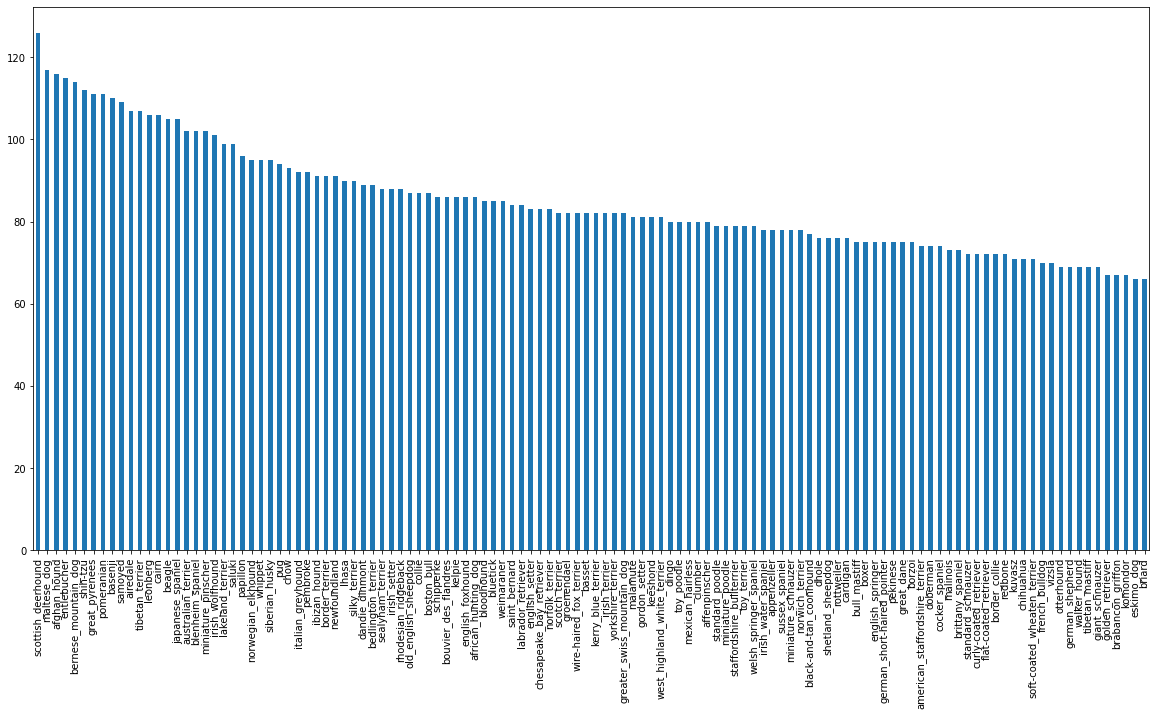

In [ ]:
# How many images are there of each breed?

labels_csv.breed.value_counts().plot.bar(figsize = (20, 10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

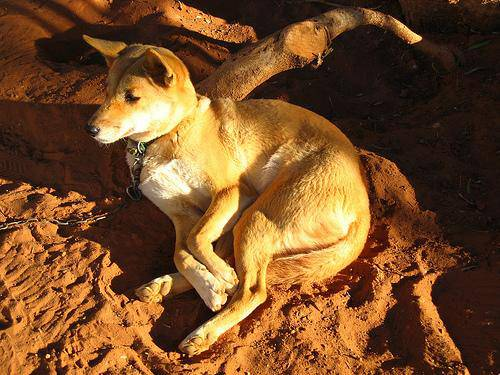

In [ ]:
# Let's view an image (Dingo Dog :D)

from IPython.display import Image
Image("drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting Images & Their Labels

Let's get a list of all our image file pathnames as the filenames are too long

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from image IDs
filenames = ["drive/MyDrive/DogVision/train/"+ fname for fname in labels_csv["id"] +".jpg"]

# Check the first 10
filenames[:10]

['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check training directory

import os
os.listdir("drive/MyDrive/DogVision/train/")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:

# Check whether the number of file names matches the actual number of image files

if len(os.listdir("drive/MyDrive/DogVision/train/")) == len(filenames):
  print("Filenames match actual amount of files. Good to go :)")
else:
  print("Filenames do not match actual amount of files. Check the target directory :(")

Filenames match actual amount of files. Good to go :)


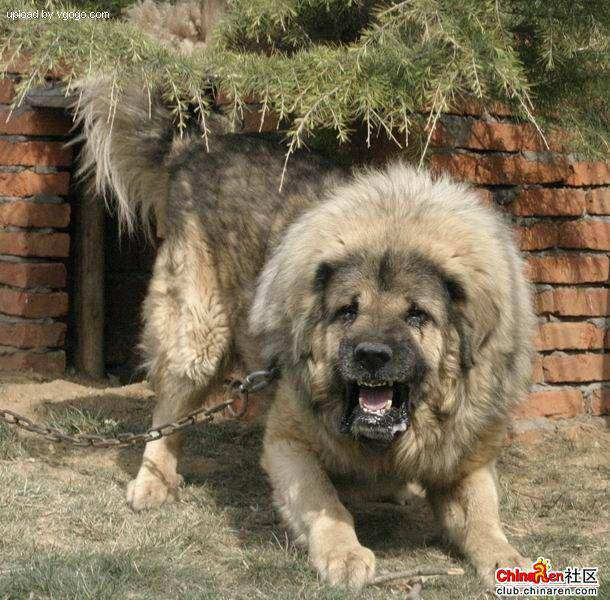

In [ ]:
# One More Check

Image(filenames[9000])

In [ ]:
# Damn, what breed is that?

labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've got our training image file paths in a list, let's prepare our labels

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels) # We can also do : to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Check if number of labels matches number of images (Check for missing data easily)
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames :)")
else:
  print("Number of labels does not match number of filenames :(")

Number of labels matches number of filenames :)


In [ ]:
# Check if all labels are unique
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn every label into a boolean array (Compare with all breeds and the only True value will be the breed it belongs to)

print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Do this for all labels

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Turning a boolean array into an array of integers

print(labels[0]) # Label 0 
print(boolean_labels[0].argmax()) # Index Where It's Breed Exists
print(boolean_labels[0].astype(int)) # There Will Be A 1 at 19th Index  

boston_bull
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set

Since the data from Kaggle doesn't come with a validation set, we'll create our own validation set

In [ ]:
# Setup X and y variables

X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

### We're going to start off experimenting with ~1000 images and increase as we need

In [ ]:
# Set number of images to be used for experimenting (Usually parameters are set as all capitals)
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000}

# Created a slider

In [ ]:
# Let's split our data using Scikit-Learn's train-test-split
from sklearn.model_selection import train_test_split

# Split into training & validation sets of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a gaze at the training data (filenames & boolean_labels)
X_train[0], y_train[0]

('drive/MyDrive/DogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

## Preprocessing Images (Turning Images Into Tensors)

To preprocess our images into tensors, let's write a function that does a few things:
1. Take an image file path as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (Convert 0-255 values to 0-1 values)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

First, let's see what importing an image looks like

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # Height, Width, Colour Channel (RGB)

(257, 350, 3)

In [ ]:
image.max(), image.min() # All values are pixel brightness values between 0 and 255

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
tf.constant(image[:2]) # Turned the image into a tensor, can be run on a GPU for faster processing

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a tensor, let's build a function to preprocess the images

1. Take an image file path as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our `image` (Convert 0-255 values to 0-1 values)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpg image into a numerical tensor with three color channels (RGB)
  image = tf.image.decode_jpeg(image, channels = 3)

  # Convert the colour channel values from 0-255 values to 0-1 values (Image Representation Using Floating Points Needs 0-1 Values)
  image = tf.image.convert_image_dtype(image, tf.float32) # Normalization !

  # Resize our image to our desired size (224,224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
tensor = tf.io.read_file(filenames[0]) # Unreadable string
tensor = tf.image.decode_jpeg(tensor, channels = 3)
tensor = tf.image.convert_image_dtype(tensor, tf.float32)
tensor = tf.image.resize(tensor, size = [224,224])
tensor[:2]

# Trying out the function line by line

<tf.Tensor: shape=(2, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.46011657, 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.3064293 ],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]]], dtype=float32)>

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go, they might not fit into memory

That's why we do about 32 (batch size) at a time. You can adjust the batch size manually

In order to use TensorFlow effectively, we need our data in the form of TensorFlow tuples: `(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path and the associated label
  Processes image and returns tuple of (image, label) 
  """
  image = process_image(image_path)
  return image, label

In [ ]:
get_image_label(X[0],tf.constant(y[0]))
# Demo Of The Above

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5705322 , 0.33588538, 0.15008473],
         [0.66901225, 0.46011657, 0.26022965],
         [0.61062384, 0.43763596, 0.21601713],
         ...,
         [0.8182312 , 0.7297958 , 0.26963907],
         [0.72454786, 0.6059109 , 0.2653059 ],
         [0.7494603 , 0.6252918 , 0.32456532]],
 
        [[0.6761415 , 0.4733761 , 0.3064293 ],
         [0.5672121 , 0.38192675, 0.20349538],
         [0.5883547 , 0.4322571 , 0.2403155 ],
         ...,
         [0.9326942 , 0.8260503 , 0.41093278],
         [0.86072475, 0.74250627, 0.3694122 ],
         [0.76781666, 0.6461604 , 0.29291284]],
 
        [[0.46350825, 0.29595745, 0.1536156 ],
         [0.42554107, 0.27039403, 0.12009467],
         [0.7887875 , 0.6547362 , 0.49015   ],
         ...,
         [0.89372385, 0.76964   , 0.41811958],
         [0.88609535, 0.7585918 , 0.36495727],
         [0.8243601 , 0.69494826, 0.2930575 ]],
 
        ...,
 
        [[0.7344025 , 0.4716574 

Now we've got a way to turn our data into tuples of tensors of the form `(image, label)`.
Let's make a function to turn all of our data (X, y) into batches of size 32

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn our data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, val_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (No Labels)
  """
  # If the data is a test dataset, we don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths, no labels (Makes dataset from slices of given tensor)
    data_batch = data.map(process_image).batch(BATCH_SIZE) # Creates batches of given batch size
    return data_batch

  # If the data is validation dataset, we don't need to shuffle it 
  elif val_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else: # It's training data
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling before preprocessing images is faster
    data = data.shuffle(buffer_size = len(X))

    # Create (image, label) tuples and preprocess the image
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Creating training and validation data batches

train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, val_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now into batches, however, these can be a little hard to understand/comprehend, let's visualize the batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a given data batch.
  """
  # Setup the figure
  plt.figure(figsize = (10,10))
  # Loop through 25 (for dislaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn grid lines off
    plt.axis("off")

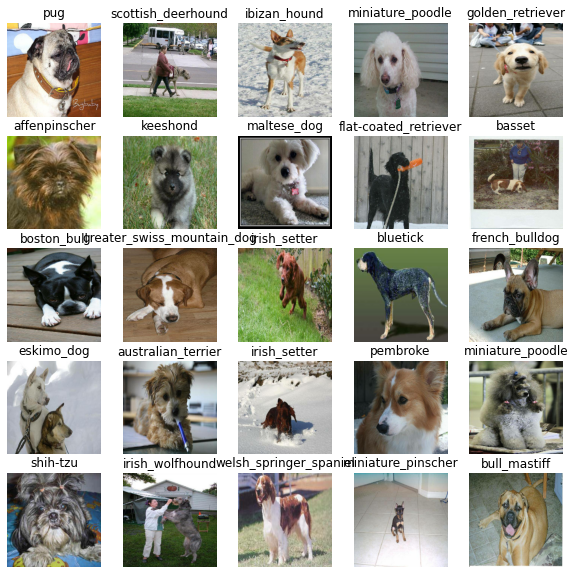

In [ ]:
# Now let's visualize the data in our training batch!
train_images, train_labels = next(train_data.as_numpy_iterator()) # Takes a batch from our batched dataset and turns it into iterable numpy array
show_25_images(train_images, train_labels)

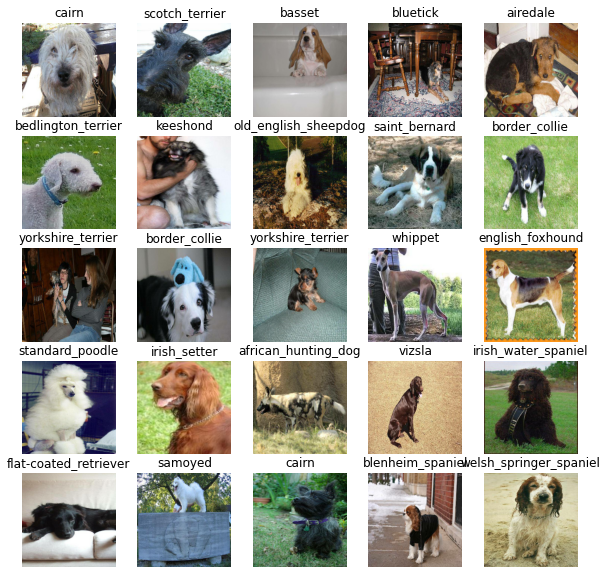

In [ ]:
# Now, let's visualize our validation set!

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building A Model

Before we build a model, we need to define a few things:

* Input Shape (Our images shape, in the form of tensors) to our model
* Output Shape (Image Labels, in the form of tensors) to our model
* The URL of the model we want to use - https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # (batch size, height, width, color channels)

# Setup output shape
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

Now we've got out inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function that:
* Takes the input shape, output shape and the model that we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do first this, then this, then that)
* Compiles the model (Says it should be evaluated and improved)
* Builds the model (Tells the model the input shape it'd be getting)
* Returns the model.

In [ ]:
from tensorflow import keras # Importing Keras API
from keras.models import Sequential # Importing The Sequential Model From Keras API
from keras.layers import Dense # Importing The Dense Layer From Keras API
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

# Create a function which builds a Keras model

def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building Model With : ", model_url)

  # Setting Up The Model Layers
  model = Sequential([
      hub.KerasLayer(model_url), # Layer 1 - Input Layer
      Dense(units = OUTPUT_SHAPE,
            activation = "softmax") # Layer 2 - Output Layer (Softmax - Gives output as collection of probabilities)
  ])

  # Compile The Model
  model.compile(
      loss = CategoricalCrossentropy(),
      optimizer = Adam(),
      metrics = ["accuracy"]
  )

  # Build The Model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building Model With :  https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5508713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,628,953
Trainable params: 120,240
Non-trainable params: 5,508,713
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions that a model can use during training to do things such as saving its progress, checking its progress or stopping training early if the model stops improving.

We'll create two callbacks:
* TensorBoard : Track Progress
* Early Stopping : Prevent Training For Too Long (Overfitting / No Improvement)

### TensorBoard Callback

* Load the TensorBoard notebook extension ✅
* Create a TensorBoard callback to save logs to directory and pass it to our model's `fit()` function ✅
* Visualize our model's training logs with the `%tensorboard` magic function (After Training) ✅

In [ ]:
# Load TensorBoard Notebook Extension

%load_ext tensorboard
# Magic Function To Load Notebook Extension

In [ ]:
import datetime
from keras.callbacks import TensorBoard, EarlyStopping
# Create a function to build a TensorBoard Callback

def create_tensorboard_callback():

  # Create a log directory to store TensorBoard logs which get tracked whenever we run an experiment
  logdir = os.path.join("drive/MyDrive/DogVision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%m%s"))
  return TensorBoard(logdir)

### Early Stopping Callback

Early Stopping : Helps prevent overfitting by stopping our model's training when improvement is negligible

In [ ]:
# Create Early Stopping Callback ( Monitor - Value To Be Tracked For Stopping , Patience = No. Of Epochs To Tolerate)

early_stopping = EarlyStopping(monitor = "val_accuracy",
                               patience = 3) 

## Training A Model (On Subset Of Data)

Our first model is going to train only on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type: "slider", min: 10, max: 100}

Let's create a function that trains a model:

* Create a model using `create_model()`
* Setup a TensorBoard Callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`), and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session whenever we train our model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [ ]:
#  Fit the model to our data
model = train_model()

Building Model With :  https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5
Epoch 1/100
25/25 [==============================] - 48s 1s/step - loss: 4.7082 - accuracy: 0.0900 - val_loss: 3.5881 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 36s 1s/step - loss: 1.8375 - accuracy: 0.6500 - val_loss: 2.3641 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 32s 1s/step - loss: 0.6436 - accuracy: 0.9337 - val_loss: 1.8035 - val_accuracy: 0.5450
Epoch 4/100
25/25 [==============================] - 36s 1s/step - loss: 0.2778 - accuracy: 0.9775 - val_loss: 1.5968 - val_accuracy: 0.5800
Epoch 5/100
25/25 [==============================] - 35s 1s/step - loss: 0.1540 - accuracy: 0.9987 - val_loss: 1.5202 - val_accuracy: 0.6050
Epoch 6/100
25/25 [==============================] - 37s 1s/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 1.4710 - val_accuracy: 0.6100
Epoch 7/100
25/25 [==============================] - 

It's overfitting! (Performing far better on training data as compared to validation data) We'll handle it soon enough ^_^

65% accuracy with training on only 1000 images is great!

### Checking The TensorBoard Logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory and visualize its contents

(Use \ to escape spaces)

In [ ]:
%tensorboard --logdir drive/My\ Drive/DogVision/logs

## Making & Evaluating Predictions Using A Trained Model 

In [ ]:
# Make predictions on the validation data (not used to train on)

predictions = model.predict(val_data, verbose = 1) # verbose -> print description of process
predictions

7/7 [==============================] - 46s 1s/step


array([[1.2107995e-02, 2.7130872e-03, 1.3234094e-04, ..., 1.8106568e-04,
        1.7725377e-04, 3.3182330e-02],
       [3.6150523e-04, 2.9263273e-04, 3.8004498e-04, ..., 3.7077366e-04,
        2.2332808e-03, 2.1721322e-05],
       [4.7210629e-05, 5.3679709e-05, 8.7731448e-04, ..., 3.5100459e-04,
        1.8300121e-03, 6.2337797e-04],
       ...,
       [2.0488874e-06, 3.5849200e-05, 8.0249329e-06, ..., 3.9382521e-05,
        5.4243228e-05, 8.0391379e-05],
       [4.8459292e-04, 6.4144304e-05, 2.2485588e-05, ..., 8.7978995e-05,
        1.1505163e-04, 7.0937560e-03],
       [4.9053265e-06, 3.1771924e-05, 6.8408978e-04, ..., 6.4562773e-04,
        1.1394012e-04, 9.1620721e-05]], dtype=float32)

In [ ]:
predictions.shape # Probabilities of all 120 classes for all 200 images in validation data

(200, 120)

In [ ]:
# Checking Out A Prediction

index = 42
print(predictions[index])
print(f"Maximum Value (Probability Of Prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Maximum Index: {np.argmax(predictions[index])}")
print(f"Predicted Label: {unique_breeds[np.argmax(predictions[index])]}")

[1.13478767e-04 4.46040904e-05 2.34202700e-04 5.43604947e-05
 1.33820751e-04 1.74613670e-05 2.36550768e-05 2.13636231e-04
 6.87708147e-03 1.69835817e-02 1.95119501e-05 6.91552850e-05
 2.75414233e-04 1.84518343e-03 1.31672830e-04 1.81692815e-03
 2.13677163e-06 1.15569865e-05 2.34673775e-04 9.62242211e-06
 3.02577846e-05 1.41370256e-04 2.44587918e-05 1.64200101e-05
 3.46253626e-03 2.62491994e-06 9.59214049e-06 6.12456688e-06
 1.35767150e-05 4.60394858e-06 5.84866066e-05 2.49906516e-05
 1.50253309e-05 8.93184624e-05 1.23273758e-05 8.59895081e-05
 1.97681384e-05 1.11693180e-05 1.95294506e-05 8.88196886e-01
 1.40981036e-04 2.87719085e-05 1.77912158e-03 4.14778651e-06
 1.10581577e-05 3.71785995e-06 4.47211387e-05 3.92383517e-04
 3.90176319e-05 3.64220577e-05 6.06621361e-05 8.27966287e-05
 8.34821476e-05 1.36265458e-04 3.41687110e-06 6.34229218e-04
 1.99931765e-06 2.21959017e-05 2.91524193e-04 7.09038432e-05
 3.11815820e-05 2.69749144e-05 9.63145612e-06 1.10622714e-05
 9.14752673e-06 3.523120

It would be great if we could see the image the prediction is being made on

**Note**: Prediction Probabilities = Confidence Intervals

In [ ]:
# Turn prediction probabilities into their respective label (Easy To Understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a prediction label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[42])
pred_label

'english_foxhound'

Since our validation data is a batched dataset, we'll have to unbatch it to make predictions on the validation images and compare them to the truth labels

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a function to unbatch a batched dataset

def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and return separate arrays of images and labels
  """
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(get_pred_label(label))
  
  return images, labels

In [ ]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we have:
* Predicted Labels
* Validation / Truth Labels
* Validation Images

Let's make it a bit more visual :D

We'll create a function which:
* Takes an array of predicted probabilities, an array of truth labels and an array of images and an integer. ✅
* Converts the predicted probabilities to a predicted label ✅
* Plots the target image, its predicted label, and its truth label on a single plot ✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
  """
  View the prediction, ground truth and image for sample 'n'
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get The Predicted Label
  pred_label = get_pred_label(pred_prob)

  # Plot Image & Remove Ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change The Colour Of The Title Depending On Right / Wrong Prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change Plot Title
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)
  

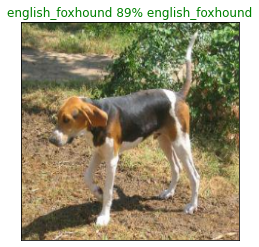

In [ ]:
plot_pred(prediction_probabilities = predictions, labels = val_labels, images = val_images, n = 42)

Let's make a function to view our model's top 10 predictions

This function will:
* Take inputs as prediction probabilities array, ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction Probabilities Indexes
  * Prediction Probabilities Values
  * Predictiion Labels
* Plot the top 10 prediction probability values and labels, colouring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n:
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction probability/confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction probability/confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  
  # Number of bars on x-axis = No. of labels
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels): # If first argument is present in second argument
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green") # Set color of true label bar to green
  else:
    pass

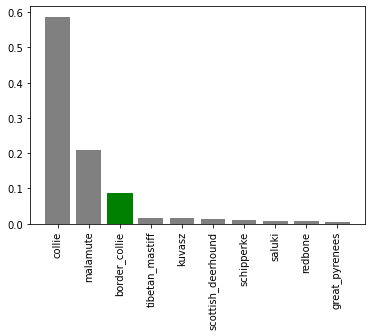

In [ ]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9)

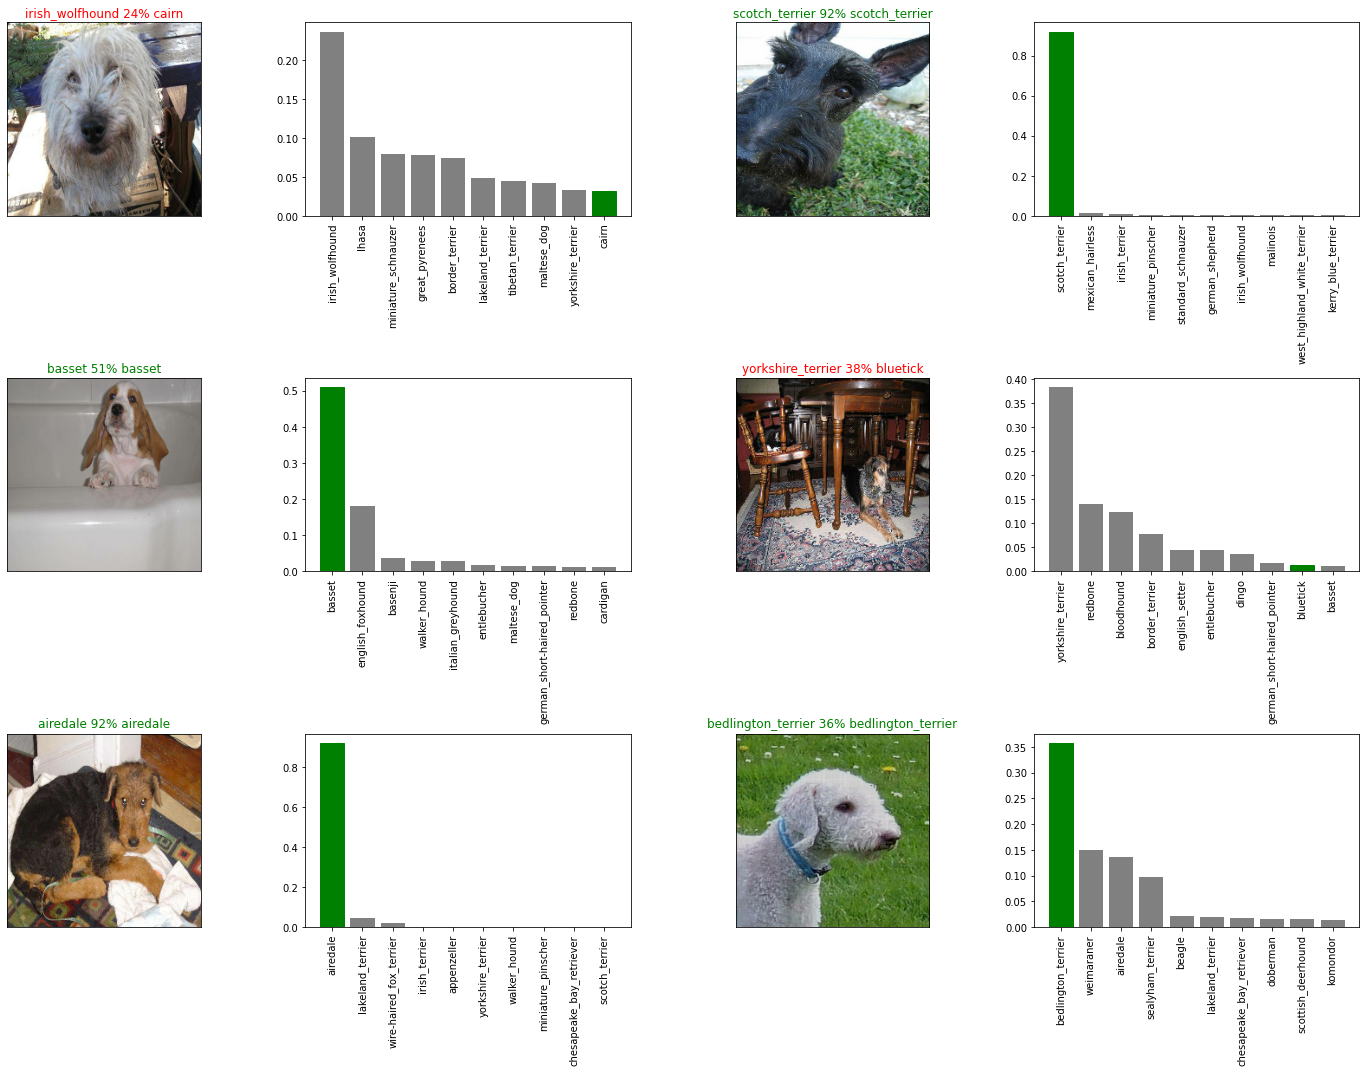

In [ ]:
# Let's check out a few predictions and their different values

i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize = (10 * num_cols, 5 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2*i + 1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i + i_multiplier)
  plt.subplot(num_rows, 2 * num_cols, 2*i + 2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving & Reloading A Trained Model 

In [ ]:
# Create a function to save a model

def save_model(model, suffix = None):
  """
  Saves a given model in our models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/DogVision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%m%s"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving Model To : {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model

def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading Saved Model From: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer": hub.KerasLayer})
  return model

Let's make sure it works!

In [ ]:
# Save our model trained on 1000 images

save_model(model, suffix = "1000-images-mobilenetv3-Adam")

Saving Model To : drive/MyDrive/DogVision/models/20230404-17041680628664-1000-images-mobilenetv3-Adam.h5...


'drive/MyDrive/DogVision/models/20230404-17041680628664-1000-images-mobilenetv3-Adam.h5'

In [ ]:
# Load our model trained on 1000 images

loaded_1000_image_model = load_model("drive/MyDrive/DogVision/models/20230404-16041680625158-1000-images-mobilenetv3-Adam.h5")

Loading Saved Model From: drive/MyDrive/DogVision/models/20230404-16041680625158-1000-images-mobilenetv3-Adam.h5


In [ ]:
# Evaluate the pre-saved model

model.evaluate(val_data)

7/7 [==============================] - 8s 1s/step - loss: 1.3320 - accuracy: 0.6650


[1.3320029973983765, 0.6650000214576721]

In [ ]:
# Evaluate the loaded model

loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 7s 771ms/step - loss: 1.3483 - accuracy: 0.6750


[1.3483184576034546, 0.675000011920929]

## Training Our Model On The Full Dataset!

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full data

full_model = create_model()

Building Model With :  https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all data, we can't monitor validation accuracy
full_model_early_stopping = EarlyStopping(monitor = "accuracy",
                                          patience = 3)

**Note:** Running the cell below will take upto 30 minutes as our GPU has to load the whole data into memory.

In [ ]:
# Fit the full model to the full data

full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 366s 1s/step - loss: 1.3748 - accuracy: 0.6716
Epoch 2/100
320/320 [==============================] - 344s 1s/step - loss: 0.3866 - accuracy: 0.8885
Epoch 3/100
320/320 [==============================] - 330s 1s/step - loss: 0.2204 - accuracy: 0.9419
Epoch 4/100
320/320 [==============================] - 342s 1s/step - loss: 0.1425 - accuracy: 0.9668
Epoch 5/100
320/320 [==============================] - 338s 1s/step - loss: 0.0972 - accuracy: 0.9816
Epoch 6/100
320/320 [==============================] - 335s 1s/step - loss: 0.0671 - accuracy: 0.9906
Epoch 7/100
320/320 [==============================] - 334s 1s/step - loss: 0.0511 - accuracy: 0.9950
Epoch 8/100
320/320 [==============================] - 338s 1s/step - loss: 0.0384 - accuracy: 0.9972
Epoch 9/100
320/320 [==============================] - 333s 1s/step - loss: 0.0335 - accuracy: 0.9976
Epoch 10/100
320/320 [==============================] - 335s 1s/step - loss: 0.026

In [ ]:
save_model(full_model, suffix = "full-image-set-mobilenetv3-Adam")

Saving Model To : drive/MyDrive/DogVision/models/20230404-19041680636056-full-image-set-mobilenetv3-Adam.h5...


'drive/MyDrive/DogVision/models/20230404-19041680636056-full-image-set-mobilenetv3-Adam.h5'

In [ ]:
# Load in the saved model

loaded_full_model = load_model("drive/MyDrive/DogVision/models/20230404-19041680636056-full-image-set-mobilenetv3-Adam.h5")

Loading Saved Model From: drive/MyDrive/DogVision/models/20230404-19041680636056-full-image-set-mobilenetv3-Adam.h5


## Making Predictions On The Test Images

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it in the same format.

Luckily, we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames ✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data has no labels)
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/DogVision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/DogVision/test/e64b53f9c0fefdd97e269c55335418e7.jpg',
 'drive/MyDrive/DogVision/test/dfc9bcbafc1e249cd07a25c8f50384e0.jpg',
 'drive/MyDrive/DogVision/test/e53b2f4211fb7a34aeaa04974b919f6d.jpg',
 'drive/MyDrive/DogVision/test/e4b8eb057df510fa776516de19c9fa92.jpg',
 'drive/MyDrive/DogVision/test/deec27ba9446dfe31c0b32586f175d6a.jpg',
 'drive/MyDrive/DogVision/test/e76a58909e6e1196bdefb3105060bcbe.jpg',
 'drive/MyDrive/DogVision/test/e6f07d64c2380bbde03a7b6ade01b859.jpg',
 'drive/MyDrive/DogVision/test/e380bd4f8375d09ae72f4f36aa610031.jpg',
 'drive/MyDrive/DogVision/test/e0c11786a50ce49abdb71397d711ecc9.jpg',
 'drive/MyDrive/DogVision/test/e2628b6bde028b5eb593616128728907.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

Calling the `predict()` function on our full model will take a long time  (~ 1 hr) as it has to go through all 10k+ images

In [ ]:
# Make predictions on test data batch using loaded full model
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose = 1)

324/324 [==============================] - 1924s 6s/step


In [ ]:
# Save predictions (NumPy array) to .csv file (For Accessing Later)
np.savetxt("drive/MyDrive/DogVision/preds_array.csv", test_predictions, delimiter = ",") # Delimiter = "," -> Comma Separated Values (Default = .txt)

In [ ]:
# Load predictions (NumPy array) from our saved .csv file
test_predictions = np.loadtxt("drive/MyDrive/DogVision/preds_array.csv", delimiter = ",")

## Preparing Test Dataset Submissions For Kaggle

Looking at the Kaggle sample submission, we find that it wants our model's prediction probability outputs in a DataFrame with an ID and a column for each different dog breed.

To get our data in this format, we'll:
* Create a pandas DataFrame with an ID column, as well as a column for each dog breed ✅
* Add data to the ID column by extracting the test image IDs from their filepaths
* Add data (prediction probabilities) to each of the dog breed columns
* Export the DataFrame as a CSV to submit it to Kaggle

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds)) 
# Making columns id and all breeds
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image IDs to predictions dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
# path contains id and .jpg extension - remove extension by using only the 0 index
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e64b53f9c0fefdd97e269c55335418e7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dfc9bcbafc1e249cd07a25c8f50384e0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e53b2f4211fb7a34aeaa04974b919f6d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e4b8eb057df510fa776516de19c9fa92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deec27ba9446dfe31c0b32586f175d6a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e64b53f9c0fefdd97e269c55335418e7,1.137865e-10,9.475828e-11,2.010880e-09,3.840429e-11,2.896388e-07,1.961866e-07,8.110650e-07,9.999055e-01,2.422130e-09,...,7.248306e-10,2.488583e-06,6.998875e-09,9.331917e-09,3.642921e-09,4.385591e-10,4.775678e-09,7.599892e-08,7.603378e-10,2.308773e-08
1,dfc9bcbafc1e249cd07a25c8f50384e0,1.955206e-05,1.035784e-07,4.328058e-07,1.323415e-06,5.496035e-05,5.662670e-06,6.123618e-02,2.438733e-06,7.704983e-10,...,1.215134e-04,1.219581e-04,6.364880e-09,4.687483e-05,4.165896e-08,1.054934e-07,1.358050e-06,1.666560e-08,1.910524e-07,9.307082e-01
2,e53b2f4211fb7a34aeaa04974b919f6d,1.181050e-10,9.999964e-01,1.870965e-10,3.027134e-08,4.147522e-10,3.571641e-12,2.987591e-11,1.605862e-10,6.071531e-10,...,6.899792e-09,1.724281e-10,2.359003e-10,1.731476e-10,5.507839e-09,3.656444e-09,1.533967e-10,1.649379e-08,1.911454e-10,1.421880e-09
3,e4b8eb057df510fa776516de19c9fa92,2.170028e-08,1.169644e-08,2.238779e-08,2.704846e-07,1.085779e-08,3.235989e-09,9.697322e-09,1.451537e-08,6.852553e-08,...,5.102655e-07,4.810295e-08,1.466887e-08,9.213941e-09,5.509823e-09,2.476210e-10,1.250189e-09,2.631738e-10,6.413659e-09,1.922087e-08
4,deec27ba9446dfe31c0b32586f175d6a,4.329447e-09,6.303121e-08,8.725024e-10,3.030725e-09,7.062766e-09,3.759302e-03,1.702887e-08,2.229311e-08,1.508015e-09,...,3.812210e-11,9.144854e-12,4.554310e-07,3.060188e-08,7.074576e-09,4.028469e-08,3.909502e-09,4.036697e-07,1.277409e-09,1.003996e-07


In [ ]:
# Save our predictions dataframe to .csv for submission to Kaggle
preds_df.to_csv("drive/MyDrive/DogVision/full_model_predictions_submission_1_mobilenetv3.csv",
                index = False)

## Making Predictions On Custom Images

To make predictions on custom images, we'll:
* Get the filepaths of our own images
* Turn the filepaths into data batches using `create_data_batches()` and since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to our prediction labels.
* Compare the predicted labels to custom images.

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/DogVision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/MyDrive/DogVision/my-dog-photos/chowchow.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/maltipoo.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/pug.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/border collie.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/shih tzu.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/siberian husky.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/australian shepherd.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/pembroke welsh corgi.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/beagle.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/american staffordshire terrier.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/shetland sheepdog.jpg',
 'drive/MyDrive/DogVision/my-dog-photos/shiba inu.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds= loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
custom_preds[:1]

array([[6.73887127e-11, 1.03568744e-10, 2.77838114e-10, 6.06970341e-09,
        1.42416008e-08, 1.45990442e-10, 3.76910031e-10, 1.32180045e-09,
        1.01828955e-10, 4.14669854e-10, 2.40491741e-12, 6.06007189e-11,
        3.52030280e-11, 4.19144927e-11, 2.41826958e-09, 7.97021737e-12,
        2.46724863e-10, 1.10307130e-12, 1.22856808e-10, 3.63174113e-09,
        8.51037185e-10, 9.30888366e-10, 6.62003577e-11, 4.75331302e-11,
        6.57201307e-11, 1.22177923e-07, 1.71846370e-09, 3.92853222e-10,
        3.55726071e-09, 1.28790423e-10, 9.99992430e-01, 1.00697195e-09,
        1.06908350e-10, 1.37975832e-07, 9.86930537e-10, 1.00511974e-10,
        1.11867622e-12, 1.27536215e-09, 3.65070439e-11, 7.64222398e-13,
        7.87321597e-12, 3.25101794e-12, 1.54714100e-12, 9.42409972e-09,
        1.23702604e-10, 8.78055351e-10, 3.57436414e-10, 4.04033751e-11,
        5.79067384e-11, 2.77330123e-08, 5.21076411e-11, 1.91810545e-09,
        1.34210310e-10, 8.65968852e-10, 8.21598967e-09, 3.586099

In [ ]:
custom_preds.shape

(12, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['chow',
 'toy_poodle',
 'pug',
 'border_collie',
 'lhasa',
 'siberian_husky',
 'collie',
 'pembroke',
 'beagle',
 'american_staffordshire_terrier',
 'collie',
 'dingo']

In [ ]:
# Get custom images
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

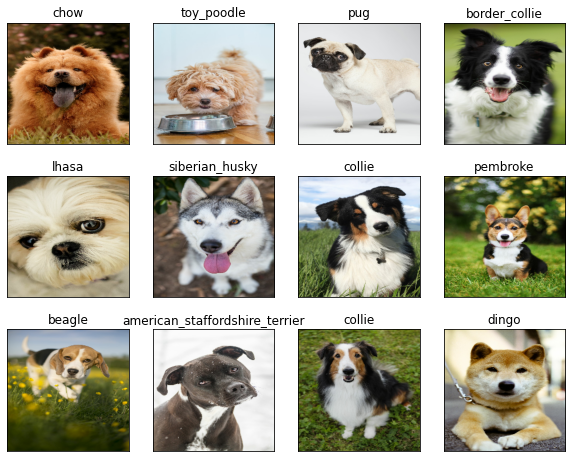

In [ ]:
# Check custom image predictions
plt.figure(figsize = (10,8))
for i, image in enumerate(custom_images):
  plt.subplot(3, 4, i+1) # Rows, column, index
  plt.xticks([])
  plt.yticks([]) # No need of ticks, set empty array
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

## Congratulations! We successfully built an end-to-end dog breed classifier model :D